### Import Libs

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

2023-03-12 09:09:48.324395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


(28, 28)


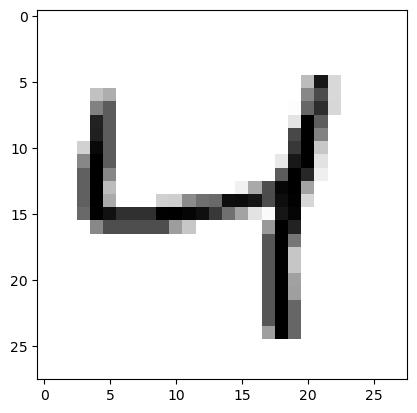

In [5]:
digit = train_images[2]
print(digit.shape)
plt.imshow(digit, cmap="binary")
plt.show()

### Prepare data

In [6]:
# Flatten Images
print("Flatten Images")
print("Before ",train_images[0].shape )
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
print("After ",train_images[0].shape )

# Normalize the pixel values
print("\nNormalize the pixel values ")
print("Before ",max(train_images[0]) )
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
print("After ",max(train_images[0]) )

#
print("\nConvert labels to binary class matrix")
print("Before ",train_labels[0] )
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("After ",train_labels[0] )

Flatten Images
Before  (28, 28)
After  (784,)

Normalize the pixel values 
Before  255
After  1.0

Convert labels to binary class matrix
Before  5
After  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### Building Model

In [9]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Train Model

In [12]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0696 - val_accuracy: 0.9835
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0722 - val_accuracy: 0.9822
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0751 - val_accuracy: 0.9811
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0717 - val_accuracy: 0.9834
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 7.0447e-04 - accuracy: 0.9999 - val_loss: 0.0706 - val_accuracy: 0.9838
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 4.1175e-04 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9829
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 3.1043e-04 - accuracy: 0.9999 - val_loss: 0.0722 - val_accuracy: 0

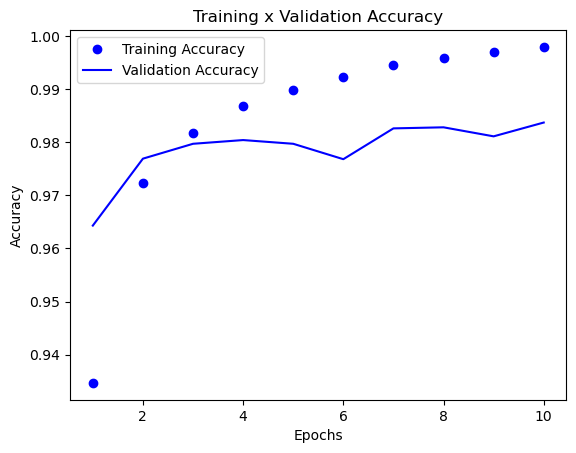

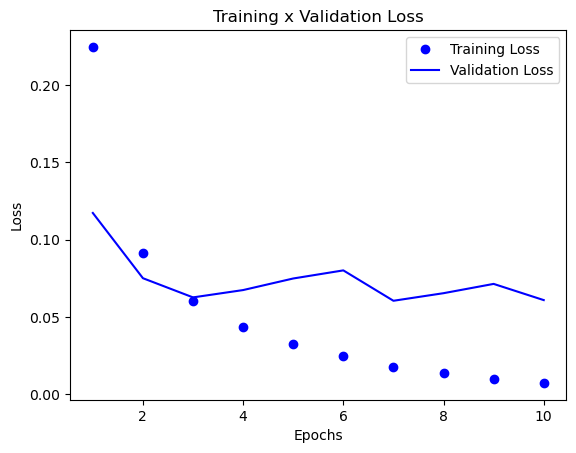

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training x Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training x Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9841
test_acc: 0.9840999841690063


In [14]:
predict_x = model.predict(test_images[0:1])
classes_x=np.argmax(predict_x,axis=1)
print("predicted labels : ",classes_x)
print("True labels : ",np.argmax(test_labels[0:1]))

1/1 [==============================] - 0s 177ms/step
predicted labels :  [7]
True labels :  7


In [16]:

arr=[10,20,30]
classes_x=np.argmax(arr)
print(classes_x)

2
